In [1]:
## Loading functions
import os
os.chdir("/data/biocomp/bahin/qPCR/qPCRquantification/")
import HiFit_pd
from HiFit_pd import *

In [3]:
import plot_physical_heatmap
from plot_physical_heatmap import *

In [30]:
## Transforming the raw Fluidigm output to HiFit input format
import os
os.chdir("/data/biocomp/bahin/qPCR/qPCRquantification/")
import qPCR_functions
from qPCR_functions import *

filepath = "/data/biocomp/bahin/qPCR/Research_plate/Fixed_keys/QV_plate/1361995046_fixed.csv"
output_filepath = "/data/biocomp/bahin/qPCR/Research_plate/Fixed_keys/QV_plate.tsv"

qPCR_functions.extract_data_from_Fluidigm_file(filepath, output_filepath)

In [2]:
## Loading the data
dir = "/data/biocomp/bahin/qPCR/Research_plate/Fixed_keys/QV_plate/"
data = pd.read_csv(dir + "final_data.Gompertz_with_bump.REF.tsv", sep="\t", index_col=0)

In [4]:
output_filepath = "/data/biocomp/bahin/qPCR/Research_plate/Fixed_keys/QV_plate.tsv"
water_samples = [1, 13, 25, 37, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]
data = qPCR_functions.gather_data(output_filepath, 9216, water_samples, "/data/biocomp/bahin/qPCR/Research_plate/Fixed_keys/", False)

Loading qPCR data from file /data/biocomp/bahin/qPCR/Research_plate/Fixed_keys/QV_plate.tsv...
Out of the 9216 considered curves, 7141 are found to be flat (amplitude < 0.18038465496237488) or from water samples. They will be discarded for the further steps (2075 remaining curves).


In [3]:
## Creating HiFit colormap
import matplotlib
from matplotlib.colors import LinearSegmentedColormap

tab20 = matplotlib.cm.get_cmap("tab20")
HiFit_colormap = tab20.colors[::2] + tab20.colors[1::2]
random_colormap = LinearSegmentedColormap.from_list("HiFit_colormap", HiFit_colormap, N=20)
matplotlib.cm.register_cmap("HiFit_colormap", random_colormap)

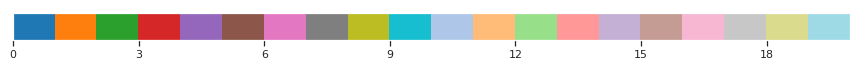

In [37]:
## Displaying HiFit colormap
from matplotlib import colors, colorbar

nlabels = 20
fig, ax = plt.subplots(1, 1, figsize=(15, 0.5))
bounds = np.linspace(0, nlabels, nlabels + 1)
norm = colors.BoundaryNorm(bounds, nlabels)
cb = colorbar.ColorbarBase(ax, cmap=random_colormap, norm=norm, spacing='proportional', ticks=None, boundaries=bounds, format='%1i', orientation=u'horizontal')

In [117]:
## Loading research data
research_data = pd.read_csv("/data/biocomp/bahin/qPCR/Research_plate/Fixed_keys/research_plate.REF.tsv", sep="\t", index_col=0)

In [5]:
output_filepath = "/data/biocomp/bahin/qPCR/Research_plate/Fixed_keys/research_plate.tsv"
water_samples = [12, 24, 36, 48, 60, 72, 84, 96]
data_research_plate = qPCR_functions.gather_data(output_filepath, 9216, water_samples, "/data/biocomp/bahin/qPCR/Research_plate/Fixed_keys/", True)

Loading qPCR data from file /data/biocomp/bahin/qPCR/Research_plate/Fixed_keys/research_plate.tsv...
Out of the 9216 considered curves, 3155 are found to be flat (amplitude < 0.22474126712699116) or from water samples. They will be discarded for the further steps (6061 remaining curves).


Sample,1,2,3,4,5,6,7,8,9,10,...,87,88,89,90,91,92,93,94,95,96
Assay,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.476158,0.463039,0.444884,0.414897,0.389319,0.420252,0.444003,0.452891,0.470466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.491132,0.476820,0.460200,0.428304,0.406615,0.433080,0.455767,0.464234,0.477564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.433088,0.0
3,0.0,0.550511,0.538880,0.516730,0.489832,0.457563,0.475812,0.498295,0.510062,0.520019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.476387,0.473640,0.451074,0.424694,0.400383,0.423270,0.000000,0.454888,0.463510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,0.0,0.000000,0.517718,0.501016,0.471240,0.444910,0.461938,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


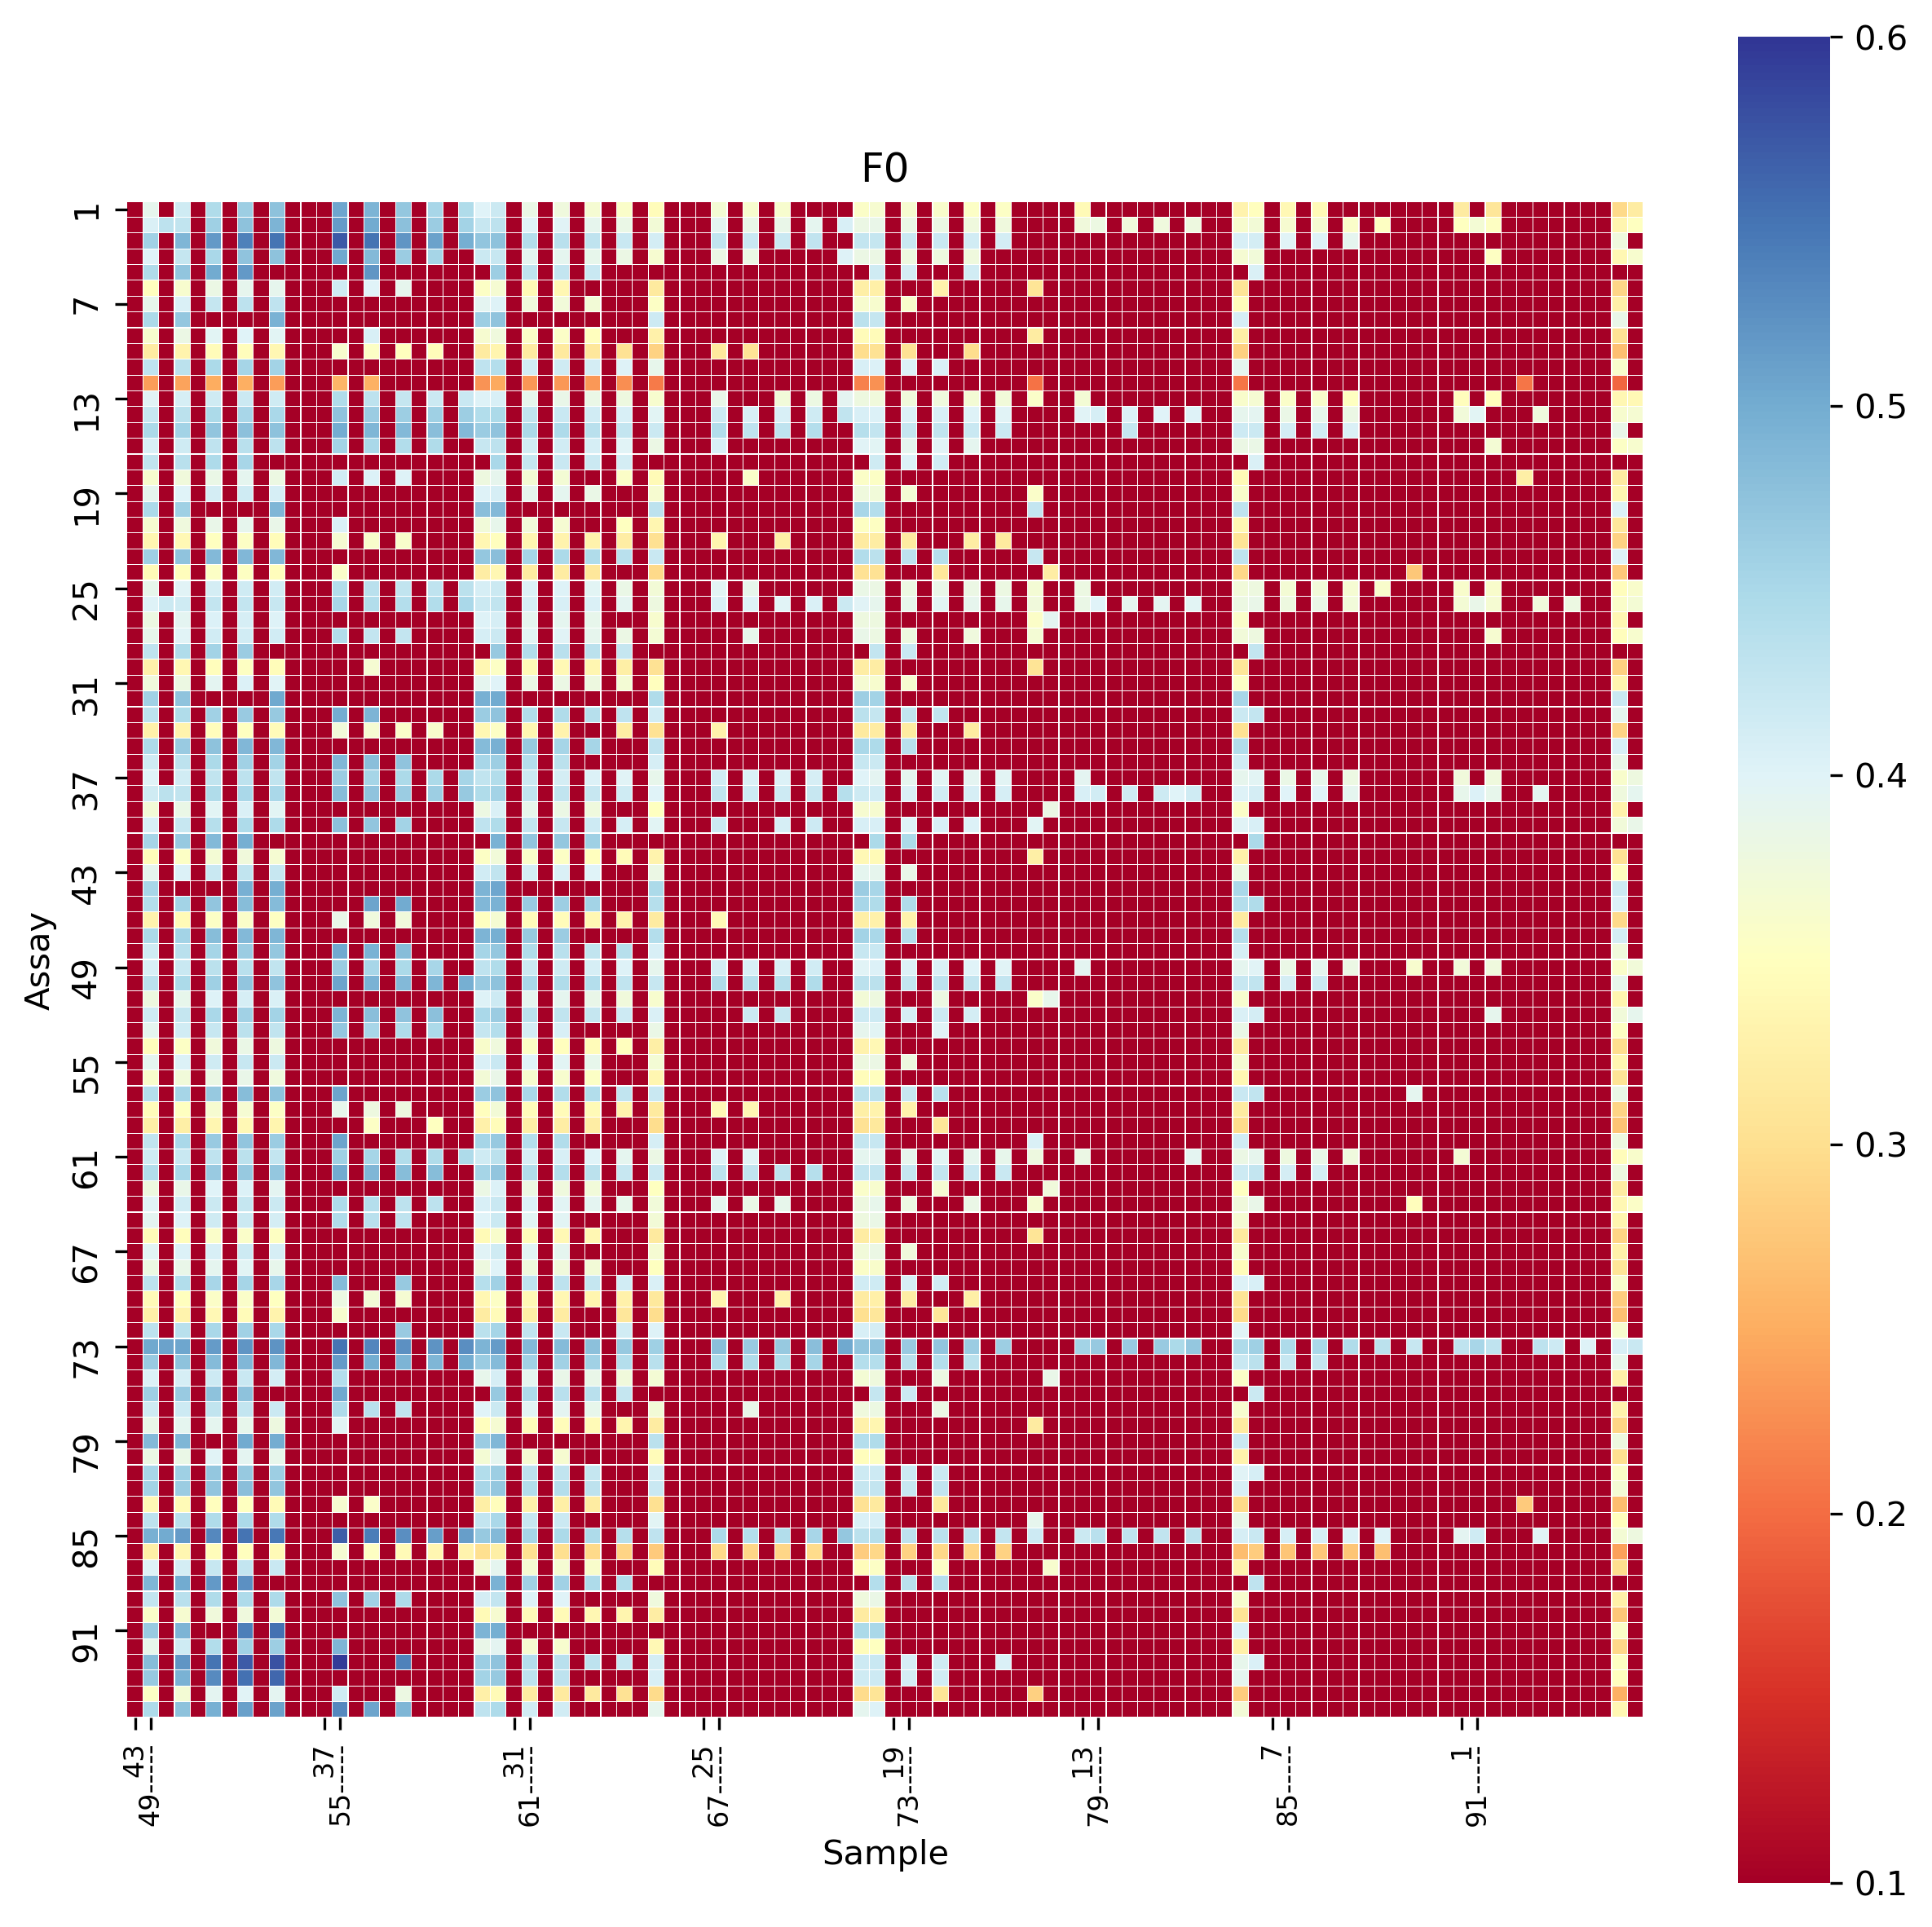

In [13]:
## Displaying F0 physical plate
# Creating the sample and assay physical order lists
assay_IDs = [x for x in range(1, 97)]
sample_IDs = [None] * 96
sample_IDs[::2] = [x for x in range(96, 48, -1)]
sample_IDs[1::2] = [y for x in range(6, 49, 6) for y in range(x, x - 6, -1)]
#print(sample_IDs)
# Creating F0 plate
data2 = data.copy()
data2.loc[data2["Sigmoid_curve"] == False, "F00"] = 0
dataset = data2.pivot(index="Assay", columns="Sample", values="F00")
display(dataset.head())
# Creating the heatmap
plot_physical_heatmap(dataset, sample_IDs, assay_IDs, "F0", "QV_plate.F0.png", "RdYlBu", 0.1, 0.6)

,WellID,Condition,Gene,Fluidigm_Ct,Sample,Assay,F00,F01,F02,F03,...,F30_mod_Gompertz_with_bump,F31_mod_Gompertz_with_bump,F32_mod_Gompertz_with_bump,F33_mod_Gompertz_with_bump,F34_mod_Gompertz_with_bump,F35_mod_Gompertz_with_bump,F36_mod_Gompertz_with_bump,F37_mod_Gompertz_with_bump,F38_mod_Gompertz_with_bump,F39_mod_Gompertz_with_bump
0,S01-A01,PS1,RPL13a1,8.491106,1,1,0.370476,0.375293,0.379359,0.384355,...,0.970113,0.975771,0.980369,0.984102,0.987129,0.989583,0.991571,0.993181,0.994484,0.995539
1,S01-A02,PS1,RPL13a1,8.375671,1,2,0.351437,0.359487,0.363358,0.368100,...,0.970076,0.975709,0.980292,0.984017,0.987043,0.989499,0.991492,0.993107,0.994417,0.995479


,WellID,Cycle,Value,Type
0,S02-A01,0,0.331285,Observed
1,S02-A01,1,0.334745,Observed


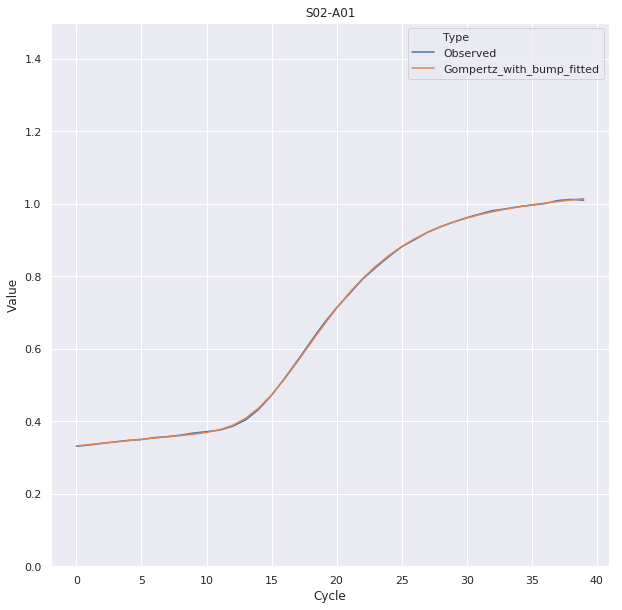

In [25]:
## Visualizing one curve
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
%matplotlib inline

# Loading data
dir = "/data/biocomp/bahin/qPCR/Research_plate/Fixed_keys/"
data = pd.read_csv(dir + "final_data.Gompertz_with_bump.REF.tsv", sep="\t")
display(data.head(2))

# Setting the well
sample = "02"
assay = "01"
wellID = "S" + sample + "-A" + assay

# Formatting the observed fluo values
dataset = data.loc[data.WellID == wellID, ["WellID"] + cycles_col]
dataset = pd.melt(dataset, id_vars=["WellID"], value_vars=cycles_col, var_name="Cycle", value_name="Value")
dataset["Cycle"] = dataset.apply(lambda row: int(row["Cycle"][1:]), axis=1)
dataset["Type"] = "Observed"

# Building the fitted curves
equations = [Gompertz_with_bump]
df = dataset.copy()
for eq in equations:
    # Creating the fitted values
    params = ["P_" + letter + "_final_" + eq.__name__ for letter in list(string.ascii_lowercase)[0:eq.__code__.co_argcount - 1]]
    df_tmp = data.loc[data.WellID == wellID][params].astype(float).T.squeeze()
    fluo_fit = pd.DataFrame(eq(np.array([range(40)]), *df_tmp))
    fluo_fit = fluo_fit.assign(WellID=wellID)
    fluo_fit = pd.melt(fluo_fit, id_vars="WellID", value_vars=range(40), var_name="Cycle", value_name="Value")
    fluo_fit.loc[:, "Type"] = eq.__name__ + "_fitted"
    # Merging the 2 DataFrames
    df = pd.concat([df, fluo_fit], sort=False, ignore_index=True)

display(df.head(2))
# Plotting the fluo curve
sns.set()
plt.figure(figsize=(10, 10))
plt.title(wellID)
plt.ylim(0, 1.5)
#plt.ylim(0.2, 0.4)
sns.lineplot(x="Cycle", y="Value", hue="Type", data=df)

,Sample,Gene,WellID,Cycle,Fluo_value
0,96,RPL13a1,S96-A01,0,0.385265
1,96,RPL13a2,S96-A02,0,0.424901


(0, 1.6)

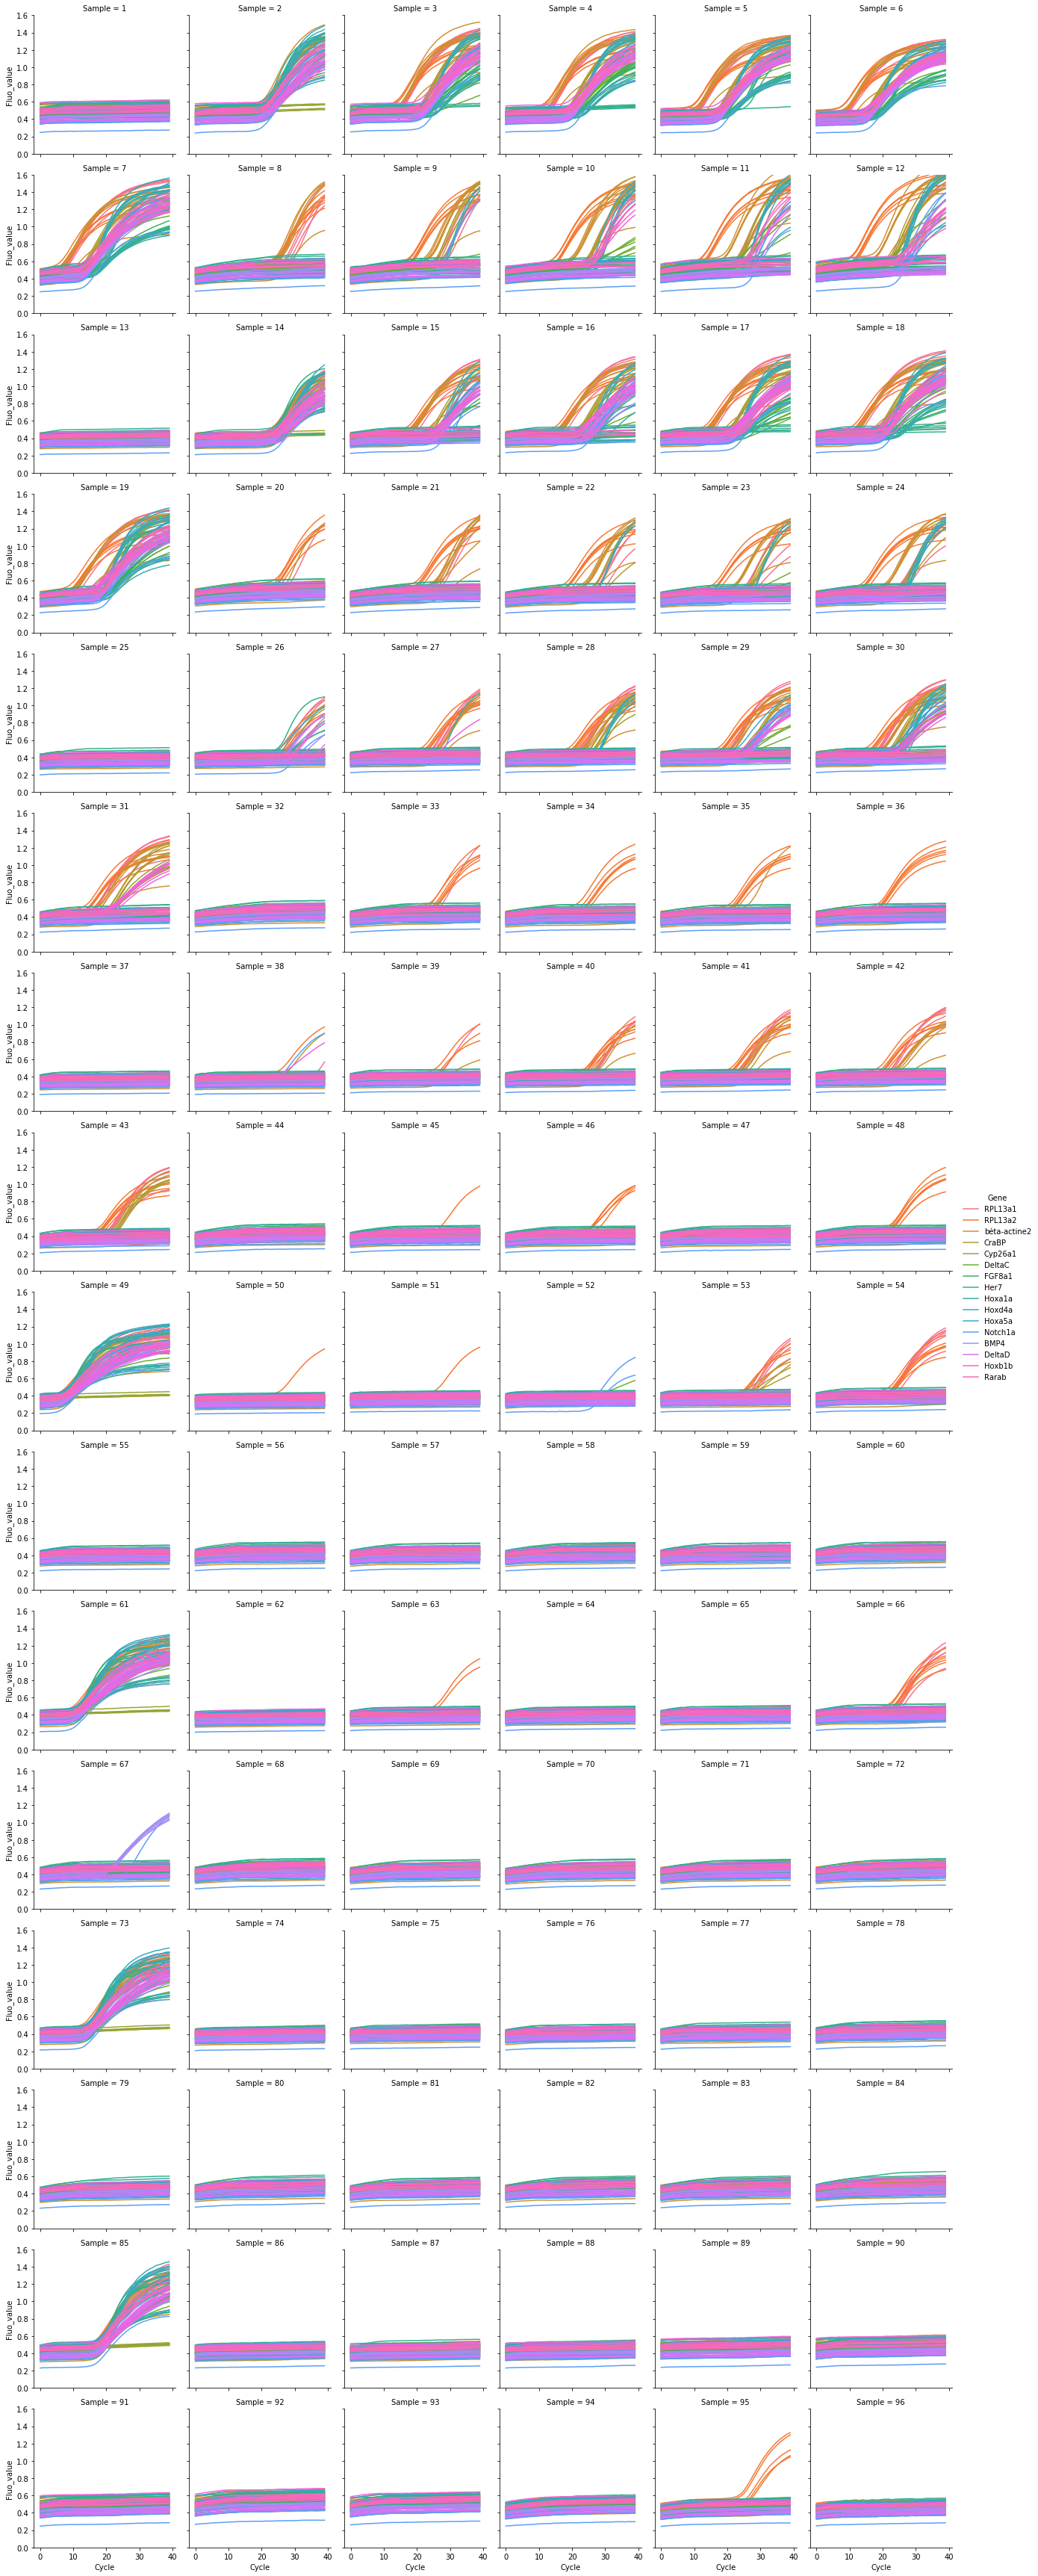

In [177]:
## Displaying raw curves
fluo = pd.melt(data, id_vars=["Sample", "Gene", "WellID"], var_name="Cycle", value_vars=cycles_col, value_name="Fluo_value")
fluo.loc[:, "Cycle"] = fluo.apply(lambda row: int(row["Cycle"][1:]), axis=1)
display(fluo.head(2))
g = sns.FacetGrid(fluo, col="Sample", hue="Gene", col_wrap=6)
g = (g.map_dataframe(sns.lineplot, "Cycle", "Fluo_value", units="WellID", estimator=None).add_legend())
plt.ylim(0, 1.6)

,WellID,Condition,Gene,Fluidigm_Ct,Sample,Assay,F00,F01,F02,F03,...,F33,F34,F35,F36,F37,F38,F39,Amplitude,Sigmoid_curve,Rising_cycle
9050,S49-A27,PS1,BMP4,6.275234,49,27,0.336683,0.336680,0.338837,0.341281,...,0.966716,0.976236,0.986937,0.999817,1.009783,1.016590,1.028828,0.692149,True,6.0
9062,S49-A39,PS1,BMP4,6.311304,49,39,0.328637,0.329977,0.332201,0.330974,...,0.937758,0.950727,0.962965,0.974145,0.983300,0.991104,0.999942,0.671305,True,7.0


,Sample,Gene,WellID,Condition,Cycle,Fluo_value
0,49,BMP4,S49-A27,PS1,0,0.336683
1,49,BMP4,S49-A39,PS1,0,0.328637


(0, 1.6)

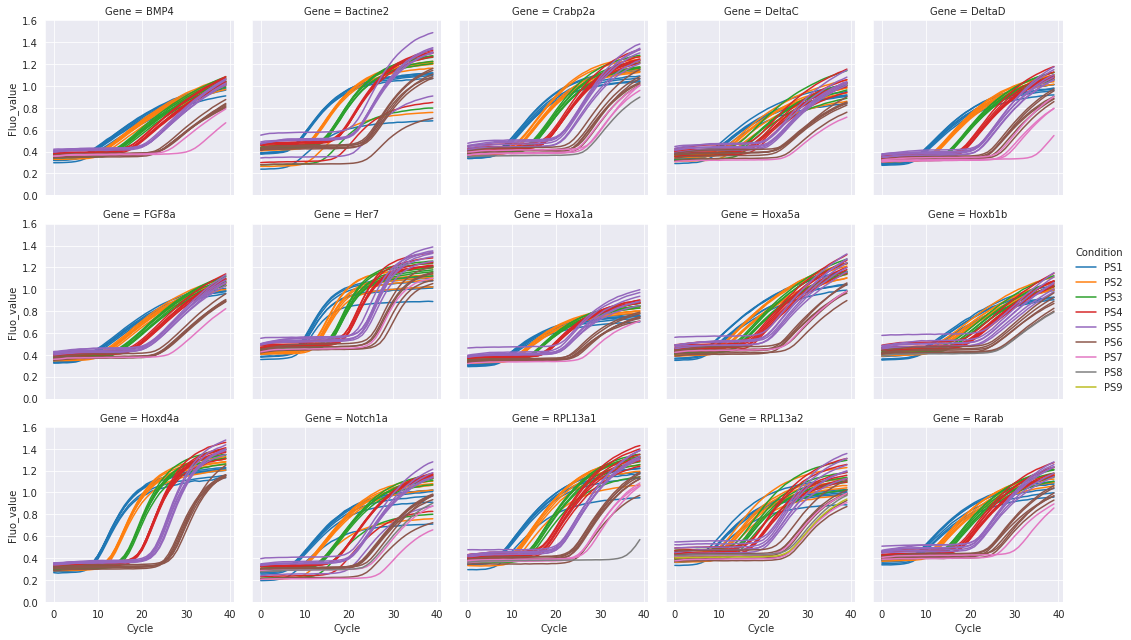

In [11]:
## Displaying raw curves
samples = ["PS" + str(x) for x in range(1, 13)]
dataset = data.loc[data.Condition.isin(samples) & data.Sigmoid_curve]
dataset = dataset.sort_values(by=["Gene", "Condition"])
display(dataset.head(2))
fluo = pd.melt(dataset, id_vars=["Sample", "Gene", "WellID", "Condition"], var_name="Cycle", value_vars=cycles_col, value_name="Fluo_value")
fluo.loc[:, "Cycle"] = fluo.apply(lambda row: int(row["Cycle"][1:]), axis=1)
display(fluo.head(2))
sns.set_style("darkgrid")
g = sns.FacetGrid(fluo, col="Gene", hue="Condition", palette=HiFit_colormap, col_wrap=5)
g = (g.map_dataframe(sns.lineplot, "Cycle", "Fluo_value", units="WellID", estimator=None).add_legend())
plt.ylim(0, 1.6)

In [15]:
## Ranking genes mean F0
dataset = data.loc[data.Condition.isin(samples) & data.Sigmoid_curve]
grouped = dataset.groupby("Gene")["F00"].mean()
print(grouped.sort_values())

Gene
Notch1a     0.287538
Hoxd4a      0.316414
DeltaD      0.325974
Hoxa1a      0.348657
BMP4        0.364562
DeltaC      0.367341
FGF8a       0.374762
RPL13a1     0.384136
Crabp2a     0.393563
Bactine2    0.410072
Rarab       0.413508
RPL13a2     0.418551
Hoxb1b      0.428794
Hoxa5a      0.434312
Her7        0.448884
Name: F00, dtype: float64


/users/biocomp/bahin/miniconda3/envs/Env_conda_qPCR/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


In [17]:
## Ranking genes mean F0 (reasearch plate)
dataset = data_research_plate.loc[data_research_plate.Condition.isin(samples) & data_research_plate.Sigmoid_curve]
grouped_research_plate = dataset.groupby("Gene")["F00"].mean()
print(grouped_research_plate.sort_values())
grouped_research_plate.to_csv("/data/biocomp/bahin/tmp2.tsv", sep="\t")

Gene
BMP4        0.211239
Crabp2a     0.213649
Notch1a     0.214731
DeltaD      0.214904
Hoxd4a      0.244057
Hoxa1a      0.251927
DeltaC      0.260588
Rarab       0.273890
Hoxa5a      0.293570
RPL13a1     0.300079
FGF8a       0.304573
RPL13a2     0.307795
Bactine2    0.317858
Hoxb1b      0.335318
Her7        0.351794
Name: F00, dtype: float64


/users/biocomp/bahin/miniconda3/envs/Env_conda_qPCR/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


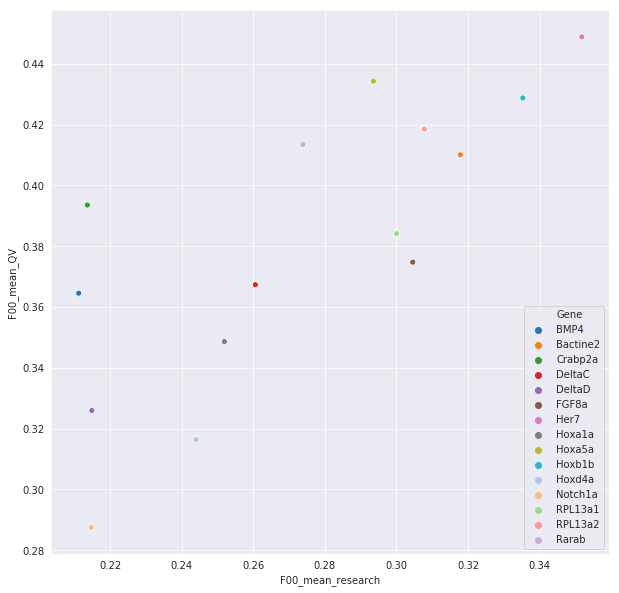

In [14]:
#df = grouped.merge(grouped_research_plate)
import pandas as pd

df = pd.DataFrame({"F00_mean_research": grouped_research_plate, "F00_mean_QV": grouped}).reset_index()
plt.figure(figsize=(10, 10))
sns.scatterplot(x="F00_mean_research", y="F00_mean_QV", hue="Gene", palette=HiFit_colormap, data=df)

In [17]:
insert_sizes = pd.DataFrame(np.array([["BMP4", 106], ["Bactine2", 70], ["Crabp2a", 75], ["Cyp26a1", 88], ["DeltaC", 63],
                                      ["DeltaD", 94], ["FGF8a1", 86], ["Her7", 76], ["Hoxa1a", 80], ["Hoxa5a", 80],
                                      ["Hoxb1b", 80], ["Hoxd4a", 80], ["Notch1a", 74], ["RPL13a1", 82], ["RPL13a2", 54], ["Rarab", 72]]),
                            columns=["Gene", "Size"])
insert_sizes.set_index("Gene", inplace=True)
display(insert_sizes)

,Size
Gene,
BMP4,106
Bactine2,70
Crabp2a,75
Cyp26a1,88
DeltaC,63
DeltaD,94
FGF8a1,86
Her7,76
Hoxa1a,80


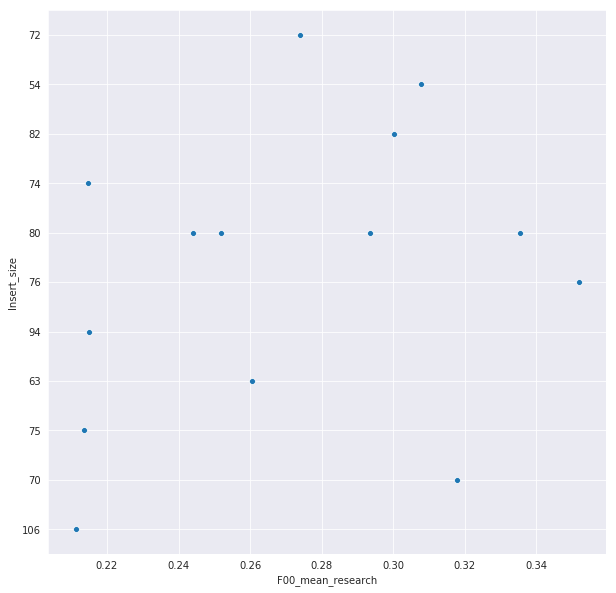

In [24]:
df = pd.DataFrame({"F00_mean_research": grouped_research_plate, "Insert_size": insert_sizes["Size"]}).reset_index()
plt.figure(figsize=(10, 10))
sns.scatterplot(x="F00_mean_research", y="Insert_size", palette=HiFit_colormap, data=df)

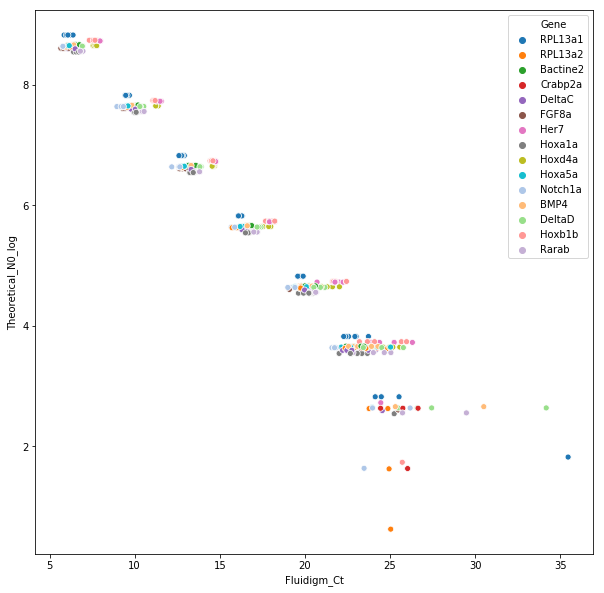

In [4]:
## Plotting Fluidigm Ct vs theoretical N0 (log)

# Selecting the dataset
dataset = data.loc[data.Condition.str.startswith("PS") & data.Sigmoid_curve].copy()

# Plotting
plt.figure(figsize=(10, 10))
sns.scatterplot(x="Fluidigm_Ct", y="Theoretical_N0_log", hue="Gene", palette=HiFit_colormap, data=dataset)

In [85]:
## Saving data for AG deep learning test
dataset = pd.read_csv("/data/biocomp/bahin/qPCR/Research_plate/Fixed_keys/QV_plate/QV_plate.REF.tsv", sep="\t")
display(dataset.head(2))

# Saving the DataFrame
dataset.set_index("WellID", inplace=True)
dataset = dataset.loc[(data.Pre_amplification == 0) & (dataset.Sigmoid_curve), ["Condition", "Gene", "Theoretical_N0"] + cycles_col]
display(dataset.head(2))
dataset.to_csv("/projects/biocomp/Projects/qPCR/QV_plate.AG.tsv", sep="\t")

,WellID,Condition,Gene,Fluidigm_Ct,Sample,Assay,F00,F01,F02,F03,...,F38,F39,Pre_amplification,S_or_C,Dilution,Amplitude,Sigmoid_curve,Rising_cycle,Theoretical_N0,Theoretical_N0_log
0,S96-A01,APPL18CRTNEG,RPL13a1,999.0,96,1,0.385265,0.384076,0.385566,0.385902,...,0.394434,0.395473,NaN,NaN,NaN,0.013080,False,0,NaN,NaN
1,S96-A02,APPL18CRTNEG,RPL13a2,999.0,96,2,0.424901,0.429097,0.429535,0.430074,...,0.443114,0.443084,NaN,NaN,NaN,0.019422,False,0,NaN,NaN


,Condition,Gene,Sigmoid_curve,Theoretical_N0,F00,F01,F02,F03,F04,F05,...,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39
WellID,,,,,,,,,,,,,,,,,,,,,
S02-A01,PS5,RPL13a1,True,66539.962121,0.476158,0.476692,0.476260,0.474625,0.475876,0.475313,...,1.080636,1.126474,1.171210,1.211598,1.252643,1.282870,1.313538,1.342670,1.363787,1.385145
S02-A02,PS5,RPL13a2,True,42395.187626,0.491132,0.492866,0.495925,0.497764,0.497479,0.498786,...,1.044811,1.080948,1.114153,1.139914,1.165046,1.187043,1.205384,1.221955,1.237083,1.251823


In [5]:
## Counting true/false feat comparisons according to theoretical N0 for the whole dataset
def compare_feat(df, feat, reversed=False):
    dataset = df.loc[:, ["Condition", "Gene", "S_or_C", feat, "Fluidigm_Ct", "Theoretical_N0_log", "key"]].copy()
    dataset = dataset.groupby(["Gene", "Condition"]).filter(lambda row: row.Condition.count() == 6).copy()
    dataset.reset_index(inplace=True)
    pairs = pd.merge(dataset, dataset, on="key", suffixes=["_1", "_2"])
    #display(pairs.head(2))
    #pairs = pairs.loc[(pairs.WellID_1 < pairs.WellID_2) & ((pairs.Condition_1 != pairs.Condition_2) | (pairs.Gene_1 != pairs.Gene_2))]
    #pairs = pairs.loc[(pairs.Condition_1 != pairs.Condition_2) | (pairs.Gene_1 != pairs.Gene_2)]
    #pairs = pairs.loc[((pairs.Condition_1 != pairs.Condition_2) | (pairs.Gene_1 != pairs.Gene_2)) & (np.abs(pairs.Theoretical_N0_log_1 - pairs.Theoretical_N0_log_2) < 2)]
    pairs = pairs.loc[((pairs.Condition_1 != pairs.Condition_2) | (pairs.Gene_1 != pairs.Gene_2)) & (np.abs(pairs.Theoretical_N0_log_1 - pairs.Theoretical_N0_log_2) < 2) & (np.abs(pairs.Theoretical_N0_log_1 - pairs.Theoretical_N0_log_2) > 0.1)]
    #display(pairs.head(2))
    pairs.loc[:, "Fluidigm_status"] = ((pairs.Theoretical_N0_log_1 > pairs.Theoretical_N0_log_2) & (pairs["Fluidigm_Ct_1"] < pairs["Fluidigm_Ct_2"])) | ((pairs.Theoretical_N0_log_1 < pairs.Theoretical_N0_log_2) & (pairs["Fluidigm_Ct_1"] > pairs["Fluidigm_Ct_2"]))
    #print("Fluidigm accuracy:", "{:.1%}".format(pairs.loc[pairs.Fluidigm_status, :].shape[0] / pairs.shape[0]))
    if reversed:
        pairs.loc[:, "Feat_status"] = ((pairs.Theoretical_N0_log_1 > pairs.Theoretical_N0_log_2) & (pairs[feat + "_1"] < pairs[feat + "_2"])) | ((pairs.Theoretical_N0_log_1 < pairs.Theoretical_N0_log_2) & (pairs[feat + "_1"] > pairs[feat + "_2"]))
    else:
        pairs.loc[:, "Feat_status"] = ((pairs.Theoretical_N0_log_1 > pairs.Theoretical_N0_log_2) & (pairs[feat + "_1"] > pairs[feat + "_2"])) | ((pairs.Theoretical_N0_log_1 < pairs.Theoretical_N0_log_2) & (pairs[feat + "_1"] < pairs[feat + "_2"]))
    print(feat, "accuracy:", "{:.1%}".format(pairs.loc[pairs.Feat_status, :].shape[0] / pairs.shape[0]))
    #errors = pairs.loc[((pairs.Theoretical_N0_log_1 > pairs.Theoretical_N0_log_2) & (pairs[feat + "_1"] > pairs[feat + "_2"])) | ((pairs.Theoretical_N0_log_1 < pairs.Theoretical_N0_log_2) & (pairs[feat + "_1"] < pairs[feat + "_2"]))]
    pairs.to_csv("/data/biocomp/bahin/tmp.tsv", sep="\t", index=False)
    return pairs

dataset = data.loc[data.Sigmoid_curve & data.Condition.str.startswith("PS"), :].copy()

#errors = compare_feat(data, "F00")
#compare_feat(data, "F00_mod_Gompertz_with_bump")
pairs = compare_feat(dataset, "P_c_final_Gompertz_with_bump", reversed=True)
#compare_feat(data, "P_d_final_Gompertz_with_bump")

P_c_final_Gompertz_with_bump accuracy: 90.8%


In [6]:
## Trying the linear regression with the parameters "c" and "d"
from scipy.optimize import minimize

# Equations
def residualSumSquare_predict(parameter_rss, data, equation):
    return np.sum((np.array(data["Theoretical_N0_log"]) - equation(data["P_c_final_Gompertz_with_bump"], data["P_d_final_Gompertz_with_bump"], *parameter_rss))**2)

def linear_reg_2p(Pc, Pd, a, b, c):
    return Pc * a + Pd * b + c

def quadratic_eq_beg(Pc, Pd, a, b, c, d, e):
    return a * np.exp(b * Pc) + c * np.exp(d * Pd) + e

def quadratic_eq(Pc, Pd, a, b, c, d, e, f, g):
    return a * np.exp(b * Pc) + c * np.exp(d * Pd) + Pc * e + Pd * f + g

def quadratic_true_eq(Pc, Pd, a, b, c, d, e, f, g):
    return a * Pc**2 * Pd**2 + b * Pc**2 * Pd + c * Pc * Pd**2 + d * Pc * Pd + e * Pc + f * Pd + g 

def simple_eq(Pc, Pd, a, b, c):
    return a * Pc + b * Pd + c

def simple_plus_exp_eq(Pc, Pd, a, b, c, d):
    return a * Pc + b * Pd + c + np.power(d, Pc)

def Tif_eq(Pc, Pd, a, b, c, d, e, f):
    return a * Pc + b * Pd + c + d / Pc + e / Pd + f / (Pc * Pd)

def mega_Tif_eq(Pc, Pd, a, b, c, d, e, f, h, i, j, k, l, m):
    return h * Pc + i * Pd + j + k/Pc + l/Pd + m/(Pc * Pd) + \
a * Pc**2 * Pd**2 + b * Pc**2 * Pd + c * Pc * Pd**2 + d * Pc * Pd + e * Pc + f * Pd

# Filtering the dataset
dataset = data.loc[data.Sigmoid_curve & data.Condition.str.startswith("PS"), :].copy()

# Setting the equation
#eq = linear_reg_2p
#eq = quadratic_eq
#eq = quadratic_true_eq
#eq = simple_eq
#eq = simple_plus_exp_eq
eq = Tif_eq
#eq = mega_Tif_eq

# Adjusting the parameters minimizing the RSS
x0 = [1] * (eq.__code__.co_argcount - 2)
minimized_IPS = minimize(residualSumSquare_predict, x0=x0, args=(dataset, eq), method="Nelder-Mead", options={"maxiter":10000} )
print(minimized_IPS)

# Computing the predicted value
dataset.loc[:, "Predicted_N0"] = eq(dataset["P_c_final_Gompertz_with_bump"], dataset["P_d_final_Gompertz_with_bump"], *minimized_IPS.x)
print(dataset[["Theoretical_N0_log", "Predicted_N0"]].head())
print(np.mean(np.abs(dataset["Theoretical_N0_log"] - dataset["Predicted_N0"])))

# Checking the results
pairs = compare_feat(dataset, "Predicted_N0")

 final_simplex: (array([[-0.30135511,  9.30088979,  7.58987627,  0.32599683,  0.60234126,
        -0.74924507],
       [-0.30135508,  9.30090304,  7.5898745 ,  0.32597684,  0.60234097,
        -0.74924239],
       [-0.30135535,  9.3009007 ,  7.58987692,  0.32603729,  0.60234241,
        -0.74926799],
       [-0.30135515,  9.30090035,  7.58987202,  0.32601665,  0.60234217,
        -0.74925974],
       [-0.30135537,  9.30095848,  7.58986189,  0.32591813,  0.60234304,
        -0.74924353],
       [-0.30135494,  9.30089812,  7.58987229,  0.32591556,  0.60234003,
        -0.74921313],
       [-0.3013553 ,  9.30094486,  7.58986059,  0.32596833,  0.6023439 ,
        -0.74926041]]), array([57.58792811, 57.58792811, 57.58792811, 57.58792811, 57.58792811,
       57.58792811, 57.58792811]))
           fun: 57.58792811167486
       message: 'Optimization terminated successfully.'
          nfev: 1237
           nit: 783
        status: 0
       success: True
             x: array([-0.30135511,  9.

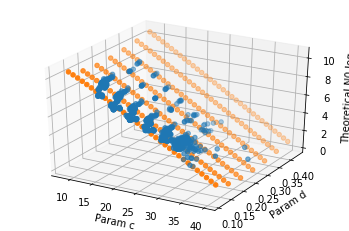

In [14]:
## Displaying params "c" and "d" against theoretical N0 in 3D + the predicting plan
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Setting the real data
dataset = data.loc[data.Sigmoid_curve & data.Condition.str.startswith("PS"), :].copy()

# Setting the plan
l1 = range(8, 41)
l2 = np.arange(0.13, 0.47, 0.05)
dataset2 = pd.DataFrame(list(product(l1, l2)), columns=["l1", "l2"])
#display(dataset2.head(2))
dataset2.loc[:, "Testing"] = dataset2.apply(lambda row: eq(row.l1, row.l2, *minimized_IPS.x), axis=1)

# Displaying both
threedee = plt.figure().gca(projection='3d')
threedee.scatter(dataset.P_c_final_Gompertz_with_bump, dataset.P_d_final_Gompertz_with_bump, dataset.Theoretical_N0_log)
threedee.scatter(dataset2.l1, dataset2.l2, dataset2.Testing)
threedee.set_xlabel("Param c")
threedee.set_ylabel("Param d")
threedee.set_zlabel("Theoretical N0 log")
plt.show()

8.573599424331816 39.835496741310415 0.17125465923776745 0.4676091699047741


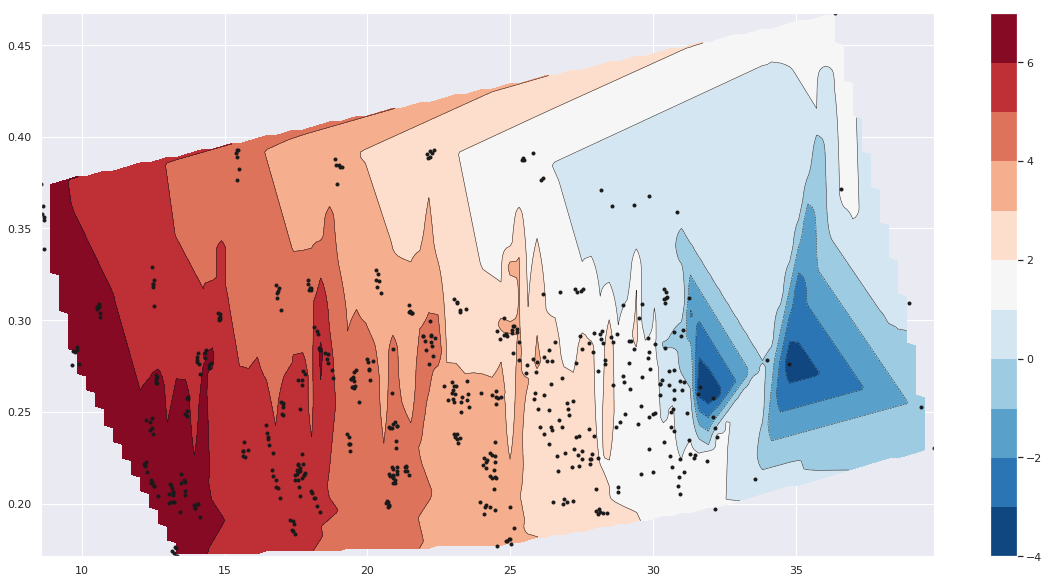

In [32]:
## TriLinearInterpolation approach
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

npts = 200
ngridx = 100
ngridy = 200
dataset = data.loc[data.Sigmoid_curve & data.Condition.str.startswith("PS"), :].copy()
x = dataset["P_c_final_Gompertz_with_bump"]
y = dataset["P_d_final_Gompertz_with_bump"]
z = dataset["Theoretical_N0_log"]

print(x.min(), x.max(), y.min(), y.max())

fig, ax1 = plt.subplots(nrows=1, figsize=(20,10))

# Creating regularly spaced values from x min to x max
xi = np.linspace(x.min(), x.max(), ngridx)
# Creating regularly spaced values from y min to y max
yi = np.linspace(y.min(), y.max(), ngridy)

# Creating the interpolation function
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
# Creating a mesh grid encompassing all data from x and y min to x and y max
Xi, Yi = np.meshgrid(xi, yi)
# Interpolating z values
zi = interpolator(Xi, Yi)

ax1.contour(xi, yi, zi, levels=10, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=10, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax1)
ax1.plot(x, y, 'ko', ms=3)  # Show the points

In [95]:
## Testing whether I can have a good error rate (comparing 2 curves) with a plan defined by 3 points
import numpy as np
from multiprocessing import Pool
import random

# Setting the dataset
dataset = data.loc[data.Sigmoid_curve & data.Condition.str.startswith("PS"), :].copy()

def get_error_rate(x):
    # Getting 3 random points
    df = dataset.sample(n=3, random_state=x)
    #display(df)
    p1, p2, p3 = df.loc[:, ["P_c_final_Gompertz_with_bump", "P_d_final_Gompertz_with_bump", "Theoretical_N0_log"]].to_numpy()
    # Getting two vectors in the plane
    v1 = p3 - p1
    v2 = p2 - p1
    # Getting the cross product that is normal to the plane
    cp = np.cross(v1, v2)
    a, b, c = cp

    # Predicting the N0s
    dataset.loc[:, "Predicted_N0_log"] = (dataset.loc[:, "P_c_final_Gompertz_with_bump"]*cp[0] + dataset.loc[:, "P_d_final_Gompertz_with_bump"]*cp[1] - np.dot(cp, p1))/(-1*cp[2])
    #display(dataset.loc[:, ["Theoretical_N0_log", "Predicted_N0_log"]].head())
    pairs = compare_feat(dataset, "Predicted_N0_log")
    return pairs.loc[pairs.Feat_status, :].shape[0] / pairs.shape[0]

# Running the function several times in parallell
if __name__ == '__main__':
    pool = Pool(processes=50)
    test = [random.randrange(1, 5000, 1) for _ in range(500)]
    res = pool.map(get_error_rate, test)

    # Displaying the results
    plt.hist(res)

Predicted_N0_log accuracy: 92.9%
Predicted_N0_log accuracy: 84.0%
Predicted_N0_log accuracy: 88.0%
Predicted_N0_log accuracy: 92.4%
Predicted_N0_log accuracy: 92.9%
Predicted_N0_log accuracy: 69.9%
Predicted_N0_log accuracy: 88.0%
Predicted_N0_log accuracy: 87.8%
Predicted_N0_log accuracy: 86.7%
Predicted_N0_log accuracy: 93.2%
Predicted_N0_log accuracy: 92.3%
Predicted_N0_log accuracy: 89.6%
Predicted_N0_log accuracy: 87.2%
Predicted_N0_log accuracy: 93.2%
Predicted_N0_log accuracy: 91.7%
Predicted_N0_log accuracy: 88.2%
Predicted_N0_log accuracy: 90.0%
Predicted_N0_log accuracy: 91.5%
Predicted_N0_log accuracy: 86.6%
Predicted_N0_log accuracy: 92.9%
Predicted_N0_log accuracy: 73.1%
Predicted_N0_log accuracy: 59.7%
Predicted_N0_log accuracy: 88.2%
Predicted_N0_log accuracy: 91.4%
Predicted_N0_log accuracy: 87.7%
Predicted_N0_log accuracy: 89.8%
Predicted_N0_log accuracy: 88.0%
Predicted_N0_log accuracy: 86.9%
Predicted_N0_log accuracy: 90.7%
Predicted_N0_log accuracy: 88.0%
Predicted_

Predicted_N0_log accuracy: 86.3%
Predicted_N0_log accuracy: 81.1%
Predicted_N0_log accuracy: 92.5%
Predicted_N0_log accuracy: 87.3%
Predicted_N0_log accuracy: 88.0%
Predicted_N0_log accuracy: 91.8%
Predicted_N0_log accuracy: 89.3%
Predicted_N0_log accuracy: 89.6%
Predicted_N0_log accuracy: 91.9%
Predicted_N0_log accuracy: 86.5%
Predicted_N0_log accuracy: 87.3%
Predicted_N0_log accuracy: 79.3%
Predicted_N0_log accuracy: 93.2%
Predicted_N0_log accuracy: 93.1%
Predicted_N0_log accuracy: 70.3%


KeyboardInterrupt: 

Process ForkPoolWorker-25:
Traceback (most recent call last):
  File "/users/biocomp/bahin/miniconda3/envs/Env_conda_qPCR/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/users/biocomp/bahin/miniconda3/envs/Env_conda_qPCR/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/users/biocomp/bahin/miniconda3/envs/Env_conda_qPCR/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/users/biocomp/bahin/miniconda3/envs/Env_conda_qPCR/lib/python3.7/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "<ipython-input-95-0938af4aa385>", line 24, in get_error_rate
    pairs = compare_feat(dataset, "Predicted_N0_log")
  File "<ipython-input-57-8ac1d1e9d956>", line 21, in compare_feat
    pairs.to_csv("/data/biocomp/bahin/tmp.tsv", sep="\t", index=False)
  File "/users/biocomp/bahin/miniconda3/envs/Env_conda_qPCR/l

In [19]:
print(np.mean(res))

0.8334935015581059


In [24]:
## Fitting a plane to 4 points (https://stackoverflow.com/questions/20699821/find-and-draw-regression-plane-to-a-set-of-points/44315297)
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.optimize
import functools

df = dataset.sample(n=4)
p1, p2, p3, p4 = df.loc[:, ["P_c_final_Gompertz_with_bump", "P_d_final_Gompertz_with_bump", "Theoretical_N0_log"]].to_numpy()
points = np.array([p1, p2, p3, p4])

fun = functools.partial(error, points=points)
params0 = [0, 0, 0]
res = scipy.optimize.minimize(fun, params0)

dataset.loc[:, "Predicted_N0_log"] = res.x[0] * dataset.loc[:, "P_c_final_Gompertz_with_bump"] + res.x[1] * dataset.loc[:, "P_d_final_Gompertz_with_bump"] + res.x[2]
display(df[["Theoretical_N0_log", "Predicted_N0_log"]].head(2))
pairs = compare_feat(dataset, "Predicted_N0_log")

KeyError: "['Predicted_N0_log'] not in index"

Predicted_N0_log accuracy: 92.9%
Predicted_N0_log accuracy: 90.6%
Predicted_N0_log accuracy: 66.5%
Predicted_N0_log accuracy: 86.8%
Predicted_N0_log accuracy: 61.7%
Predicted_N0_log accuracy: 82.4%
Predicted_N0_log accuracy: 92.3%
Predicted_N0_log accuracy: 84.7%
Predicted_N0_log accuracy: 91.2%
Predicted_N0_log accuracy: 87.9%
Predicted_N0_log accuracy: 92.3%
Predicted_N0_log accuracy: 86.4%
Predicted_N0_log accuracy: 89.9%
Predicted_N0_log accuracy: 87.1%
Predicted_N0_log accuracy: 87.5%
Predicted_N0_log accuracy: 85.9%
Predicted_N0_log accuracy: 92.7%
Predicted_N0_log accuracy: 90.3%
Predicted_N0_log accuracy: 90.2%
Predicted_N0_log accuracy: 92.9%
Predicted_N0_log accuracy: 87.8%
Predicted_N0_log accuracy: 88.6%
Predicted_N0_log accuracy: 88.7%
Predicted_N0_log accuracy: 86.9%
Predicted_N0_log accuracy: 85.1%
Predicted_N0_log accuracy: 92.9%
Predicted_N0_log accuracy: 91.6%
Predicted_N0_log accuracy: 92.8%
Predicted_N0_log accuracy: 92.9%
Predicted_N0_log accuracy: 86.7%
Predicted_

Predicted_N0_log accuracy: 90.0%
Predicted_N0_log accuracy: 92.5%
Predicted_N0_log accuracy: 7.7%
Predicted_N0_log accuracy: 86.4%
Predicted_N0_log accuracy: 86.4%
Predicted_N0_log accuracy: 90.4%
Predicted_N0_log accuracy: 92.8%
Predicted_N0_log accuracy: 86.5%
Predicted_N0_log accuracy: 88.5%
Predicted_N0_log accuracy: 92.0%
Predicted_N0_log accuracy: 88.3%
Predicted_N0_log accuracy: 91.2%
Predicted_N0_log accuracy: 87.4%
Predicted_N0_log accuracy: 91.9%
Predicted_N0_log accuracy: 87.0%
Predicted_N0_log accuracy: 87.8%
Predicted_N0_log accuracy: 92.4%
Predicted_N0_log accuracy: 86.9%
Predicted_N0_log accuracy: 86.1%
Predicted_N0_log accuracy: 90.3%
Predicted_N0_log accuracy: 92.3%
Predicted_N0_log accuracy: 88.0%
Predicted_N0_log accuracy: 92.9%
Predicted_N0_log accuracy: 89.6%
Predicted_N0_log accuracy: 89.9%
Predicted_N0_log accuracy: 92.9%
Predicted_N0_log accuracy: 87.3%
Predicted_N0_log accuracy: 90.5%
Predicted_N0_log accuracy: 92.9%
Predicted_N0_log accuracy: 90.7%
Predicted_N

Predicted_N0_log accuracy: 88.1%
Predicted_N0_log accuracy: 88.1%


(array([  1.,   0.,   0.,   0.,   1.,   2.,   7.,   5.,  27., 457.]),
 array([0.0765068 , 0.16179524, 0.24708368, 0.33237212, 0.41766056,
        0.502949  , 0.58823744, 0.67352588, 0.75881432, 0.84410276,
        0.9293912 ]),
 <a list of 10 Patch objects>)

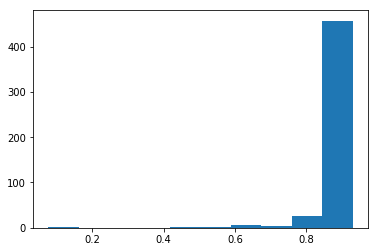

In [5]:
## Fitting a plane to 4 points (https://stackoverflow.com/questions/20699821/find-and-draw-regression-plane-to-a-set-of-points/44315297)
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.optimize
import functools
from multiprocessing import Pool
import random

# Setting the dataset
dataset = data.loc[data.Sigmoid_curve & data.Condition.str.startswith("PS"), :].copy()

def plane(x, y, params):
    a = params[0]
    b = params[1]
    c = params[2]
    z = a*x + b*y + c
    return z

def error(params, points):
    result = 0
    for (x,y,z) in points:
        plane_z = plane(x, y, params)
        diff = abs(plane_z - z)
        result += diff**2
    return result

def get_error_rate(x):
    # Getting 3 random points
    df = dataset.sample(n=4, random_state=x)
    #display(df)
    p1, p2, p3, p4 = df.loc[:, ["P_c_final_Gompertz_with_bump", "P_d_final_Gompertz_with_bump", "Theoretical_N0_log"]].to_numpy()
    points = np.array([p1, p2, p3, p4])    # Getting two vectors in the plane
    
    fun = functools.partial(error, points=points)
    params0 = [0, 0, 0]
    res = scipy.optimize.minimize(fun, params0)

    dataset.loc[:, "Predicted_N0_log"] = res.x[0] * dataset.loc[:, "P_c_final_Gompertz_with_bump"] + res.x[1] * dataset.loc[:, "P_d_final_Gompertz_with_bump"] + res.x[2]
    pairs = compare_feat(dataset, "Predicted_N0_log")
    return pairs.loc[pairs.Feat_status, :].shape[0] / pairs.shape[0]

# Running the function several times in parallell
pool = Pool(processes=50)
test = [random.randrange(1, 5000, 1) for i in range(500)]
res = pool.map(get_error_rate, test)

# Displaying the results
plt.hist(res)

In [11]:
## Compute the t-test over 6 replicates comparisons (Fluidigm Ct)
from scipy import stats

def compute_t_test(df, gene1, condition1, gene2, condition2, feat, reversed=False):
    if reversed:
        rev = -1
    else:
        rev = 1
    df1 = df.loc[(df.Gene == gene1) & (df.Condition == condition1), ["Gene", "Condition", "Theoretical_N0_log", feat]].copy()
    df2 = df.loc[(df.Gene == gene2) & (df.Condition == condition2), ["Gene", "Condition", "Theoretical_N0_log", feat]].copy()
    #display(df1)
    #display(df2)
    # https://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy
    t, p = stats.ttest_ind(df1[feat].to_list(), df2[feat].to_list())
    if ((p * combs.shape[0]) / 2 > 0.05):
    #if (p / 2 > 0.05):
        return 0
    elif df1["Theoretical_N0_log"].unique() > df2["Theoretical_N0_log"].unique():
        if t > 0:
            return 1 * rev
        else:
            return -1 * rev
    else:
        if t < 0:
            return 1 * rev
        else:
            return -1 * rev

# Selecting data: gene/condition for which the 6 replicats have a sigmoid curve
comb = dataset.groupby(["Gene", "Condition"]).filter(lambda row: row.Condition.count() == 6).copy()
# Creating all the pair combinations
comb = comb.reset_index().loc[:, ["Gene", "Condition"]].copy()
display(comb.drop_duplicates().head(2))
comb.loc[:, "key"] = 0
combs = pd.merge(comb.drop_duplicates(), comb.drop_duplicates(), on="key", suffixes=["_1", "_2"])
combs = combs.loc[((combs.Gene_1 != combs.Gene_2) | (combs.Condition_1 != combs.Condition_2)) & (combs.Gene_1 > combs.Gene_2), :].copy()
display(combs.head(2))

,Gene,Condition
0,RPL13a1,PS5
1,RPL13a2,PS5


,Gene_1,Condition_1,key,Gene_2,Condition_2
2,RPL13a1,PS5,0,Bactine2,PS5
3,RPL13a1,PS5,0,Crabp2a,PS5


In [12]:
# Testing the average Fluidigm_Ct against the ground truth
combs.loc[:, "Fluidigm_Ct_6rep_test"] = combs.apply(lambda row: compute_t_test(dataset, row.Gene_1, row.Condition_1, row.Gene_2, row.Condition_2, "Fluidigm_Ct", reversed=True), axis=1)

# Testing the average Predicted_N0 against the ground truth
combs.loc[:, "Predicted_N0_6rep_test"] = combs.apply(lambda row: compute_t_test(dataset, row.Gene_1, row.Condition_1, row.Gene_2, row.Condition_2, "Predicted_N0"), axis=1)

display(combs.head(2))
display(combs.groupby(["Fluidigm_Ct_6rep_test", "Predicted_N0_6rep_test"]).count())

,Gene_1,Condition_1,key,Gene_2,Condition_2,Fluidigm_Ct_6rep_test,Predicted_N0_6rep_test
2,RPL13a1,PS5,0,Bactine2,PS5,0,0
3,RPL13a1,PS5,0,Crabp2a,PS5,0,0


Gene_1  Condition_1   key  \
Fluidigm_Ct_6rep_test Predicted_N0_6rep_test                              
-1                    -1                          84           84    84   
                       0                          71           71    71   
                       1                          14           14    14   
 0                    -1                          28           28    28   
                       0                         324          324   324   
                       1                          50           50    50   
 1                    -1                           1            1     1   
                       0                          47           47    47   
                       1                        3077         3077  3077   

                                              Gene_2  Condition_2  
Fluidigm_Ct_6rep_test Predicted_N0_6rep_test                       
-1                    -1                          84           84  
                       0                          71           71  
                       1                          14           14  
 0                    -1                          28           28  
                       0                         324          324  
                       1                          50           50  
 1                    -1                           1            1  
                       0                          47           47  
                       1                        3077         3077